<a href="https://colab.research.google.com/github/Kidar12/GDGoC_ML_Assignment-2/blob/main/Dataset_MBP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MBP.csv to MBP (2).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

%matplotlib inline

df_mbp = pd.read_csv('/content/MBP.csv')
df_mbp.head(10)

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
5,"POCO M4 5G (Power Black, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
6,"POCO C55 (Power Black, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
7,"POCO C55 (Forest Green, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
8,"POCO C55 (Cool Blue, 128 GB)",4.1,"13,647",6 GB RAM,128 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹9,249",2023-06-17
9,"POCO M4 5G (Yellow, 128 GB)",4.2,"40,525",6 GB RAM,128 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹13,999",2023-06-17


In [ ]:
if 'Date of Scraping' in df_mbp.columns:
    df_mbp.drop(columns=['Date of Scraping'], inplace=True)

In [ ]:
df_mbp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone Name         1836 non-null   object 
 1   Rating ?/5         1836 non-null   float64
 2   Number of Ratings  1836 non-null   object 
 3   RAM                1836 non-null   object 
 4   ROM/Storage        1662 non-null   object 
 5   Back/Rare Camera   1827 non-null   object 
 6   Front Camera       1435 non-null   object 
 7   Battery            1826 non-null   object 
 8   Processor          1781 non-null   object 
 9   Price in INR       1836 non-null   object 
dtypes: float64(1), object(9)
memory usage: 143.6+ KB


In [ ]:
missing_values = df_mbp.isna().sum()
missing_percent = (missing_values / len(df_mbp)) * 100
print("Missing Values Percentage:\n", missing_percent)

for col in df_mbp.columns:
    if missing_percent[col] >= 30:
        df_mbp.drop(col, axis=1, inplace=True)
    else:
        for col in df_mbp.select_dtypes(include=np.number).columns:
            df_mbp[col].fillna(df_mbp[col].median(), inplace=True)

Missing Values Percentage:
 Phone Name            0.000000
Rating ?/5            0.000000
Number of Ratings     0.000000
RAM                   0.000000
ROM/Storage           9.477124
Back/Rare Camera      0.490196
Front Camera         21.840959
Battery               0.544662
Processor             2.995643
Price in INR          0.000000
dtype: float64


In [ ]:
df_mbp.dropna(inplace=True)

In [ ]:
df_mbp.isna().sum()

,0
Phone Name,0
Rating ?/5,0
Number of Ratings,0
RAM,0
ROM/Storage,0
Back/Rare Camera,0
Front Camera,0
Battery,0
Processor,0
Price in INR,0


In [ ]:
df_mbp.duplicated().sum()

39

In [ ]:
df_mbp.drop_duplicates(inplace = True)
df_mbp.duplicated().sum()

0

In [ ]:
fix = ['Number of Ratings']
df_mbp[fix] = df_mbp[fix].apply(pd.to_numeric, errors='coerce')
df_mbp[fix].fillna(df_mbp[fix].median(), inplace=True)
df_mbp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1252 entries, 0 to 1835
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone Name         1252 non-null   object 
 1   Rating ?/5         1252 non-null   float64
 2   Number of Ratings  171 non-null    float64
 3   RAM                1252 non-null   object 
 4   ROM/Storage        1252 non-null   object 
 5   Back/Rare Camera   1252 non-null   object 
 6   Front Camera       1252 non-null   object 
 7   Battery            1252 non-null   object 
 8   Processor          1252 non-null   object 
 9   Price in INR       1252 non-null   object 
dtypes: float64(2), object(8)
memory usage: 107.6+ KB


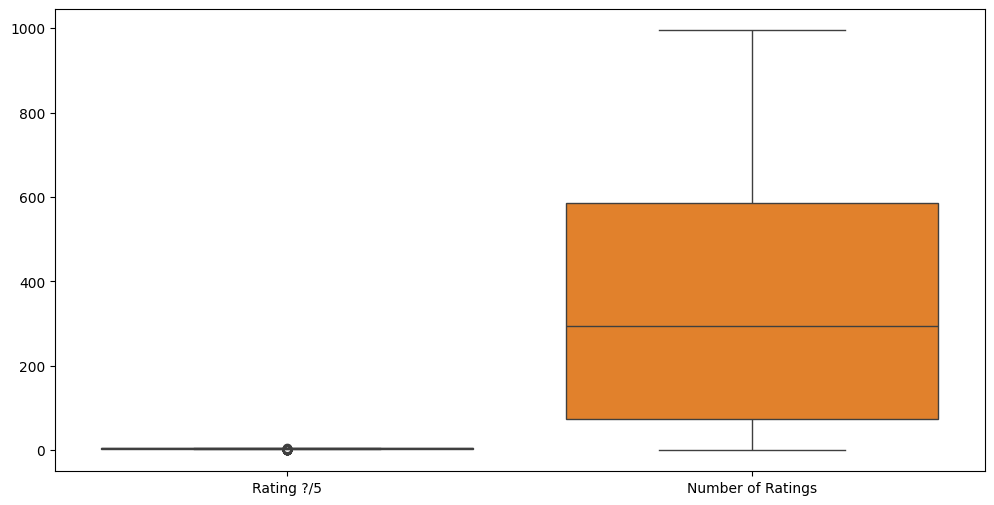

In [ ]:
num = ['Rating ?/5', 'Number of Ratings']
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_mbp[num])
plt.show()

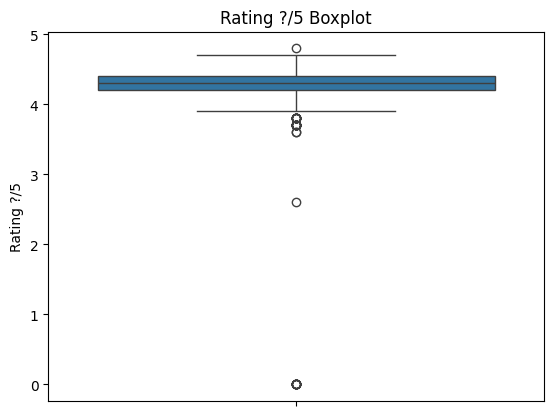

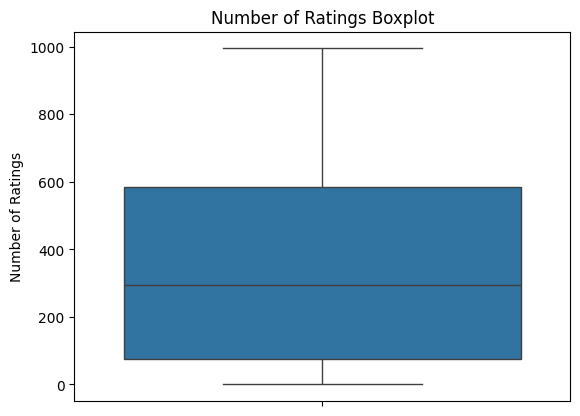

In [ ]:
sns.boxplot(data=df_mbp['Rating ?/5'])
plt.title('Rating ?/5 Boxplot')
plt.show()

sns.boxplot(data=df_mbp['Number of Ratings'])
plt.title('Number of Ratings Boxplot')
plt.show()

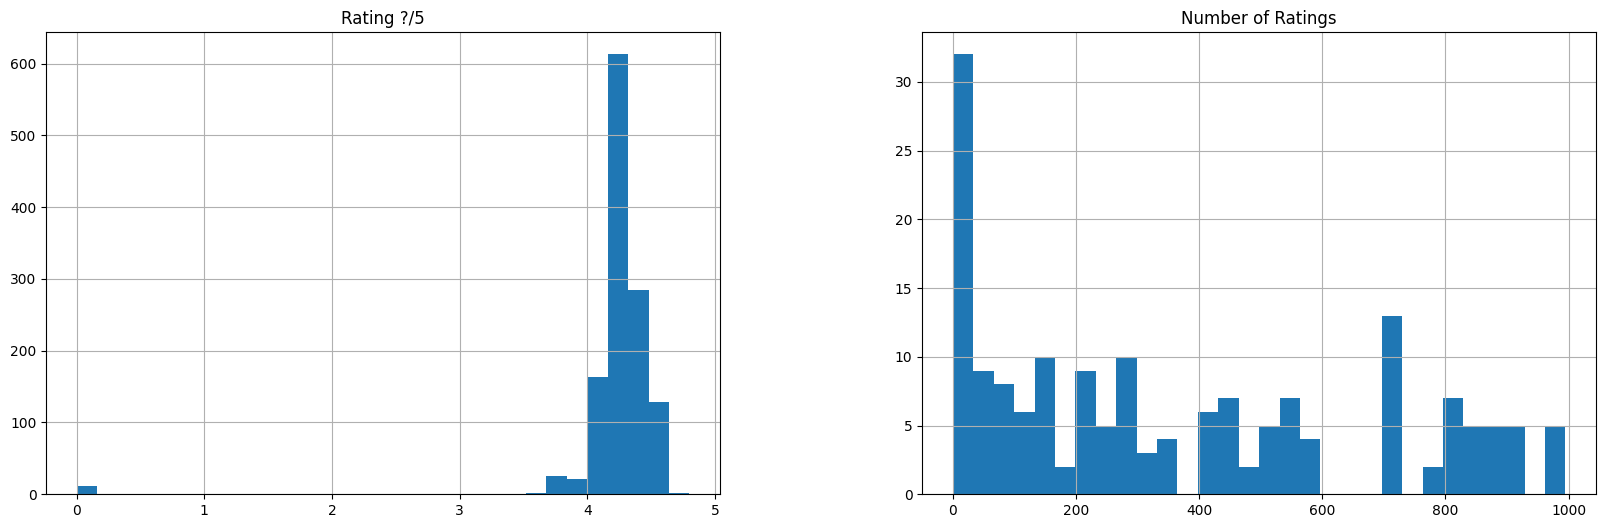

In [ ]:
df_mbp[num].hist(bins = 30, figsize = (20, 6))
plt.show()

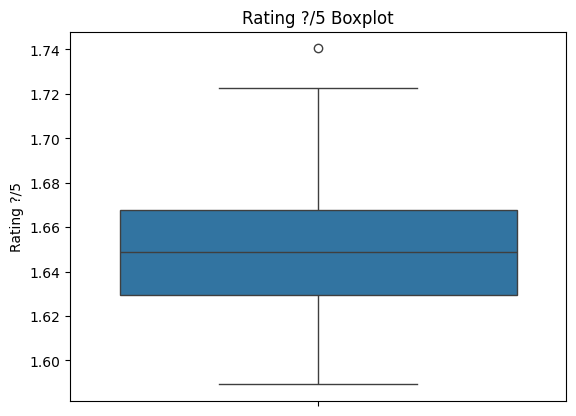

In [ ]:
def remove_outliers(data, column):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  upper_bound = Q3 + 1.5 * IQR
  lower_bound = Q1 - 1.5 * IQR
  data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
  return data

df_mbp = remove_outliers(df_mbp, 'Rating ?/5')
df_mbp = remove_outliers(df_mbp, 'Number of Ratings')

df_mbp['Rating ?/5'] = np.log(df_mbp['Rating ?/5'] + 1)

sns.boxplot(data=df_mbp['Rating ?/5'])
plt.title('Rating ?/5 Boxplot')
plt.show()

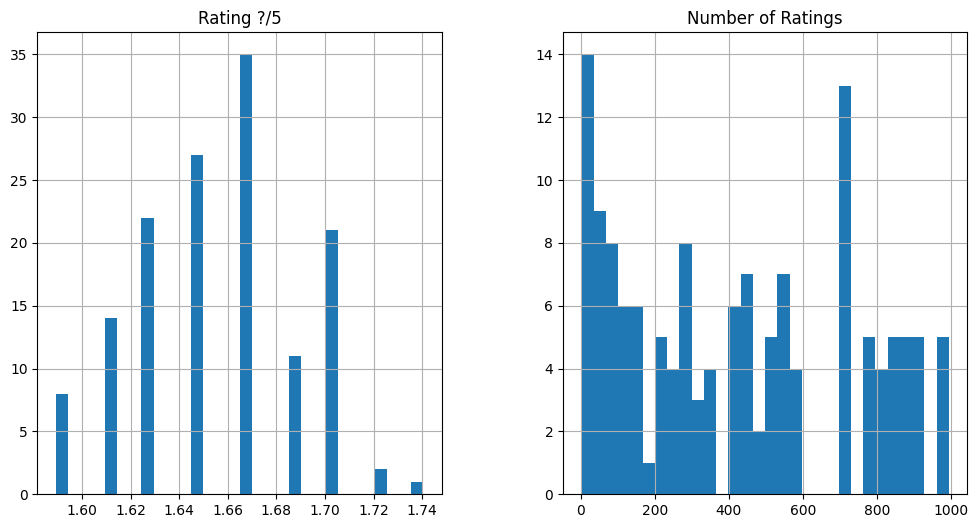

In [ ]:
df_mbp[num].hist(bins=30, figsize=(12,6))
plt.show()

In [ ]:
df_mbp['Rating Category'] = pd.qcut(df_mbp['Rating ?/5'], q=3, labels=['Low', 'Medium', 'High'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_cols = ['Number of Ratings', 'Rating ?/5']  # Sesuaikan dengan dataset
df_mbp[num_cols] = scaler.fit_transform(df_mbp[num_cols])

In [ ]:
df_mbp = pd.get_dummies(df_mbp, columns=['Rating Category'], drop_first=True)

In [ ]:
x = df_mbp.drop('Price in INR', axis=1)
y = df_mbp['Price in INR']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((105, 11), (36, 11), (105,), (36,))

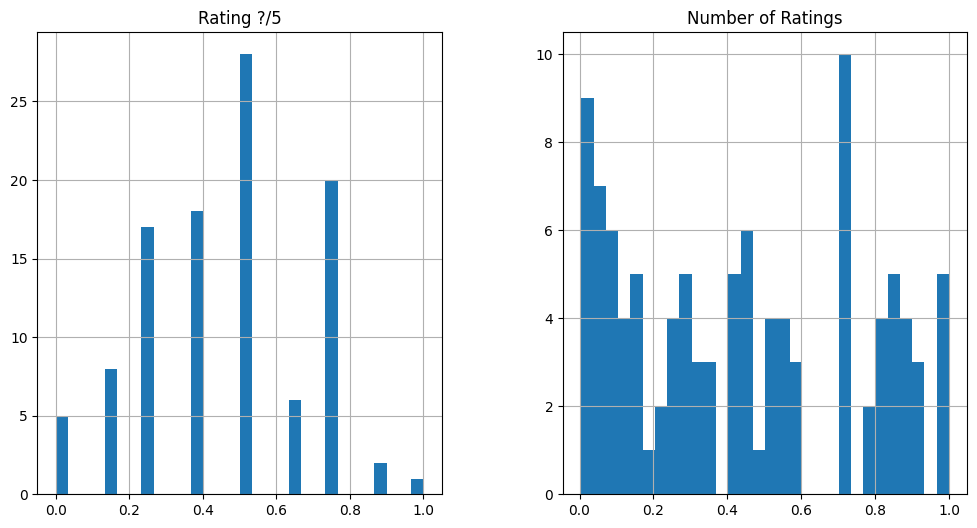

In [ ]:
x_train[num].hist(bins=30, figsize=(12,6))
plt.show()

In [ ]:
categorical_cols = x_train.select_dtypes(include=['string']).columns
x_train = pd.get_dummies(x_train, columns=categorical_cols, drop_first=True)
x_test = pd.get_dummies(x_test, columns=categorical_cols, drop_first=True)

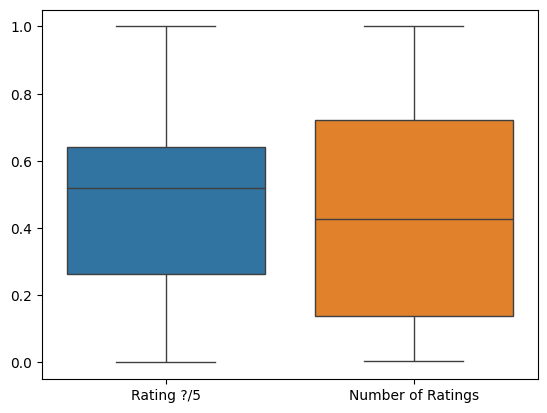

In [ ]:
sns.boxplot(data=x_train[num])
plt.show()

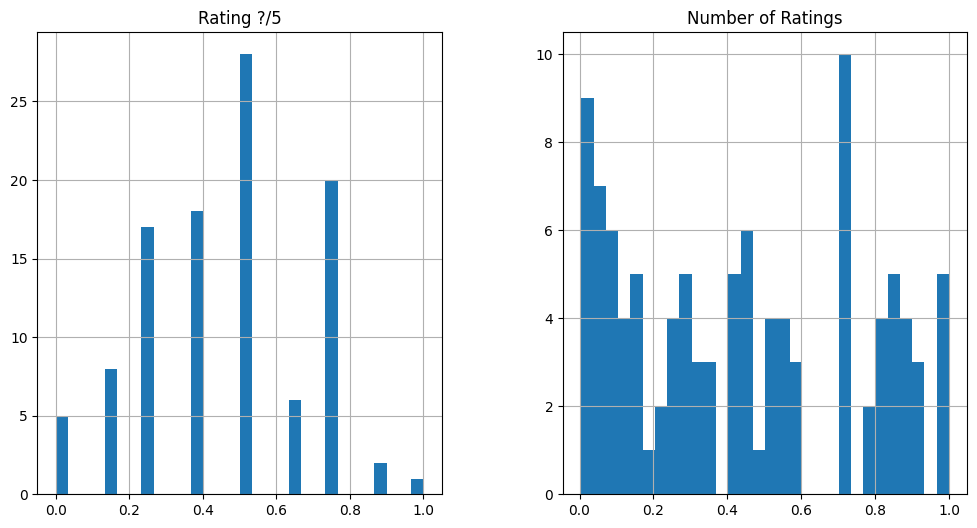

In [ ]:
x_train[num].hist(bins=30, figsize=(12,6))
plt.show()

In [ ]:
x_train['Rating ?/5'].skew(), x_train['Number of Ratings'].skew()

(-0.08553111713963274, 0.2225445798740983)

In [ ]:
categorical_cols = x_train.select_dtypes(include=['object']).columns

print('-'*50)
for col in categorical_cols:
    print(x_train[col].value_counts())
    print('-'*50)

--------------------------------------------------
Phone Name
vivo X90 (Asteroid Black, 256 GB)       2
SAMSUNG Galaxy A23 (Blue, 128 GB)       2
vivo X90 (Breeze Blue, 256 GB)          2
SAMSUNG Galaxy A13 (Black, 128 GB)      2
Nokia G21 (Nordic Blue, 64 GB)          1
                                       ..
vivo V27 Pro 5G (Magic Blue, 256 GB)    1
OPPO A785G (Blue, 128 GB)               1
OPPO A16E (Midnight Black, 32 GB)       1
OnePlus 8 (Glacial Green, 128 GB)       1
vivo X60 Pro+ (Emperor Blue, 256 GB)    1
Name: count, Length: 101, dtype: int64
--------------------------------------------------
RAM
8 GB RAM     39
4 GB RAM     22
12 GB RAM    16
3 GB RAM     13
6 GB RAM     10
2 GB RAM      4
1 GB RAM      1
Name: count, dtype: int64
--------------------------------------------------
ROM/Storage
128 GB ROM    40
256 GB ROM    29
64 GB ROM     15
32 GB ROM     14
512 GB ROM     4
8 GB ROM       3
Name: count, dtype: int64
--------------------------------------------------
Ba

In [ ]:
x_train = pd.get_dummies(x_train, columns=categorical_cols, drop_first=True)
x_test = pd.get_dummies(x_test, columns=categorical_cols, drop_first=True)

x_train.head(10)

,Rating ?/5,Number of Ratings,Rating Category_Medium,Rating Category_High,"Phone Name_Huawei Ascend G700 (White, 8 GB)","Phone Name_Huawei Honor 3X (White, 8 GB)","Phone Name_Huawei P30 Lite (Peacock Blue, 128 GB)","Phone Name_Huawei P9 (Mystic Silver, 32 GB)","Phone Name_Huawei P9 (Prestige Gold, 32 GB)","Phone Name_Huawei P9 (Titanium Grey, 32 GB)",...,Processor_Qualcomm Snapdragon 8+ Gen 1 Processor,Processor_Qualcomm Snapdragon 865 Processor,Processor_Qualcomm Snapdragon 888 Processor,"Processor_Qualcomm® Snapdragon™ 855 Plus (Octa-core, 7nm, up to 2.96 GHz) , with Qualcomm AI Engine Processor",Processor_SDM710 Processor,Processor_Snapdragon 695 Processor,Processor_Spreadtrum SC9863A Processor,Processor_Unisoc T606 Processor,Processor_Unisoc T612 processor Processor,Processor_Unisoc UMS9230 Processor
1388,0.264531,0.276939,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
934,0.518886,0.084592,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1132,0.000000,0.505539,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
803,0.518886,0.702920,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
46,0.392932,0.461229,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
748,0.518886,0.883182,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
626,0.518886,0.723061,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
658,0.264531,0.863041,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
599,0.133588,0.044310,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
608,0.518886,0.723061,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
x_train.columns

Index(['Rating ?/5', 'Number of Ratings', 'Rating Category_Medium',
       'Rating Category_High', 'Phone Name_Huawei Ascend G700 (White, 8 GB)',
       'Phone Name_Huawei Honor 3X (White, 8 GB)',
       'Phone Name_Huawei P30 Lite (Peacock Blue, 128 GB)',
       'Phone Name_Huawei P9 (Mystic Silver, 32 GB)',
       'Phone Name_Huawei P9 (Prestige Gold, 32 GB)',
       'Phone Name_Huawei P9 (Titanium Grey, 32 GB)',
       ...
       'Processor_Qualcomm Snapdragon 8+ Gen 1 Processor',
       'Processor_Qualcomm Snapdragon 865 Processor',
       'Processor_Qualcomm Snapdragon 888 Processor',
       'Processor_Qualcomm® Snapdragon™ 855 Plus (Octa-core, 7nm, up to 2.96 GHz) , with Qualcomm AI Engine Processor',
       'Processor_SDM710 Processor', 'Processor_Snapdragon 695 Processor',
       'Processor_Spreadtrum SC9863A Processor',
       'Processor_Unisoc T606 Processor',
       'Processor_Unisoc T612 processor Processor',
       'Processor_Unisoc UMS9230 Processor'],
      dtype='object

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

all_unique_values = pd.concat([pd.Series(y_train), pd.Series(y_test)]).unique()
le.fit(all_unique_values)

y_train = le.transform(y_train)
y_test = le.transform(y_test)

y_train

array([12, 22, 36, 72, 41, 18,  1, 12,  7,  1, 43, 28, 76,  8, 21, 11,  0,
       21, 50, 28, 77,  2, 78, 59, 19, 49, 39, 18, 28, 42, 72, 23, 48,  4,
       66, 10, 34, 63, 74, 47, 54, 41,  0, 70, 34, 51, 38, 39, 47, 53, 61,
       47,  5,  3, 11, 30,  7, 40, 65, 12, 56, 46, 14, 57, 15, 37, 17, 46,
       24,  4, 29, 58,  2, 59, 34, 52, 18, 76, 76, 46, 31, 27, 42,  8,  7,
       20, 33, 41,  4,  6, 41, 41, 43, 57, 68, 58, 76, 28,  9, 26, 70, 45,
       21, 25, 60])

In [ ]:
print(f'Train Label  \n{pd.Series(y_train).value_counts()}')
print()
print(f'Test Label \n{pd.Series(y_test).value_counts()}')

Train Label  
41    5
28    4
76    4
12    3
47    3
     ..
53    1
61    1
5     1
3     1
60    1
Name: count, Length: 66, dtype: int64

Test Label 
39    3
77    3
11    2
7     2
16    2
73    1
78    1
4     1
69    1
32    1
67    1
12    1
51    1
33    1
17    1
75    1
18    1
20    1
35    1
6     1
44    1
30    1
13    1
71    1
22    1
62    1
55    1
64    1
41    1
Name: count, dtype: int64


In [ ]:
x_train

,Rating ?/5,Number of Ratings,Rating Category_Medium,Rating Category_High,"Phone Name_Huawei Ascend G700 (White, 8 GB)","Phone Name_Huawei Honor 3X (White, 8 GB)","Phone Name_Huawei P30 Lite (Peacock Blue, 128 GB)","Phone Name_Huawei P9 (Mystic Silver, 32 GB)","Phone Name_Huawei P9 (Prestige Gold, 32 GB)","Phone Name_Huawei P9 (Titanium Grey, 32 GB)",...,Processor_Qualcomm Snapdragon 8+ Gen 1 Processor,Processor_Qualcomm Snapdragon 865 Processor,Processor_Qualcomm Snapdragon 888 Processor,"Processor_Qualcomm® Snapdragon™ 855 Plus (Octa-core, 7nm, up to 2.96 GHz) , with Qualcomm AI Engine Processor",Processor_SDM710 Processor,Processor_Snapdragon 695 Processor,Processor_Spreadtrum SC9863A Processor,Processor_Unisoc T606 Processor,Processor_Unisoc T612 processor Processor,Processor_Unisoc UMS9230 Processor
1388,0.264531,0.276939,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
934,0.518886,0.084592,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1132,0.000000,0.505539,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
803,0.518886,0.702920,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
46,0.392932,0.461229,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,0.518886,0.209466,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1264,0.264531,0.337362,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
574,0.392932,1.000000,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
958,0.642486,0.426989,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
x_train['Price in INR'] = y_train
x_test['Price in INR'] = y_test

In [ ]:
x_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 1388 to 1091
Data columns (total 238 columns):
 #    Column                                                                                                                                                     Non-Null Count  Dtype  
---   ------                                                                                                                                                     --------------  -----  
 0    Rating ?/5                                                                                                                                                 105 non-null    float64
 1    Number of Ratings                                                                                                                                          105 non-null    float64
 2    Rating Category_Medium                                                                                                                               

In [ ]:
x_test.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 781 to 777
Data columns (total 122 columns):
 #    Column                                                         Non-Null Count  Dtype  
---   ------                                                         --------------  -----  
 0    Rating ?/5                                                     36 non-null     float64
 1    Number of Ratings                                              36 non-null     float64
 2    Rating Category_Medium                                         36 non-null     bool   
 3    Rating Category_High                                           36 non-null     bool   
 4    Phone Name_Alcatel OT 5020E (4 GB)                             36 non-null     bool   
 5    Phone Name_Alcatel Pixi 4 (6) 4G (Metal Gold, 16 GB)           36 non-null     bool   
 6    Phone Name_Huawei AscendG730 (White, 4 GB)                     36 non-null     bool   
 7    Phone Name_MOTOROLA Edge 30 Ultra (Starlight White, 256

In [ ]:
print("Train missing data:", x_train.isna().sum().sum(), "\nTest missing data:", x_test.isna().sum().sum())
print()
print("Train duplicated data:", x_train.duplicated().sum(), "\nTest duplicated data:", x_test.duplicated().sum())

Train missing data: 0 
Test missing data: 0

Train duplicated data: 0 
Test duplicated data: 0
